In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import seaborn as sb
import numpy as np
from scipy.io import wavfile as wv
from scipy.signal import chirp
from matplotlib import cm

sb.set(style='ticks', font_scale=2)
blue, green, red, purple = sb.color_palette("deep",4)

# Digital signal processing

Python has a number of powerful tools for reading, analyzing, manipulating, and generating signals. This can be very useful for acoustic analysis of speech, analysis of EEG recordings, generation of sounds for experiments, and various other things.

In discussing digital signal processing, we'll be using sinusoids a lot. We've seen these a little bit already, but we'll review the basics here.

Here's a very brief (and very incomplete) review of trigonometry. We can illustrate the relationships between sine and cosine by inscribing a right triangle inside a unit circle (i.e., a circle with radius one): 

![](sine_cosine.png)

For the angle $\theta$ between the x-axis and the hypotenuse of the triangle, the sine of $\theta$ is the height of the triangle, and the cosine of $\theta$ is the base of the triangle. More generally, if the length of the hypotenuse (or, equivalently, the radius of the circle) is $r$, the height is $h$, and the width (base) is $w$, then:

\begin{align}
\sin(\theta) &= \frac{opposite}{hypotenuse} = \frac{h}{r}\\
\cos(\theta) &= \frac{adjacent}{hypotenuse} = \frac{w}{r}
\end{align}

If we imagine rotating the hypotenuse counter-clockwise, sweeping it over values of $\theta$ ranging from 0 to $2\pi$ (radians, i.e., $360^{\circ}$, or around the whole circle), we can plot `sin` and `cos` as *functions* of $\theta$:

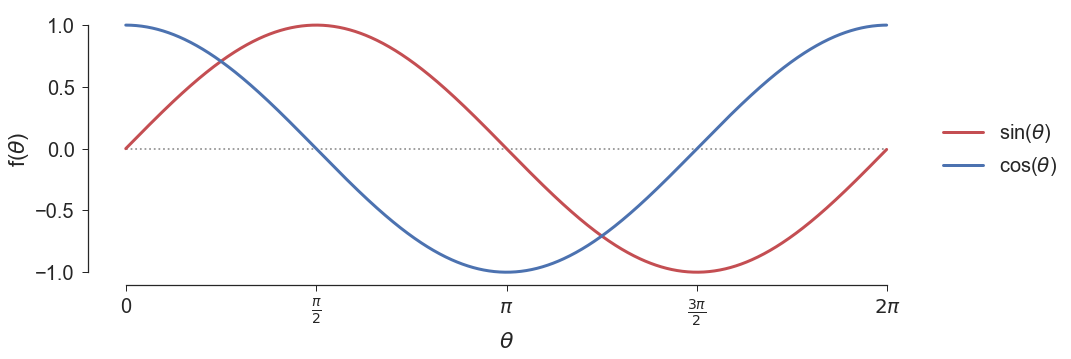

In [2]:
# sampling frequency & sampling period
f_s = 1000
t_s = 1/f_s
# vector of theta values
th = np.linspace(start=0, stop=2*np.pi, num=f_s, endpoint=False)
s = np.sin(th)
c = np.cos(th)
# plot s and c
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot((th[0],th[-1]),(0,0),':',color=[.5,.5,.5,.85])
ax.set_xticks(np.arange(0,2*np.pi+.01,np.pi/2))
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])
la, = ax.plot(th,s,lw=3, color=red)
lb, = ax.plot(th,c,lw=3, color=blue)
ax.legend((la,lb),(r'sin($\theta$)',r'cos($\theta$)'),loc='upper left', bbox_to_anchor=(1,.665))
ax.set(xlabel=r'$\theta$',ylabel=r'f($\theta$)')
sb.despine(ax=ax,trim=True)

[Here](https://www.geogebra.org/m/cNEtsbvC) is an animation of `sin` and `cos` and the radius of the unit circle.

The general formula for the cosine function of $\theta$ is $y = A \cos(\omega \theta + \phi)$. Here $A$ is the amplitude, $\omega$ is the frequency (in radians), and $\phi$ is the phase.

Note that $\displaystyle{\cos\left(\theta - \frac{\pi}{2}\right) = \sin\left(\theta\right)}$ (i.e., sin and cos are just phase-shifted copies of each other), so we can just pick one and use it (we will use `cos` generally):

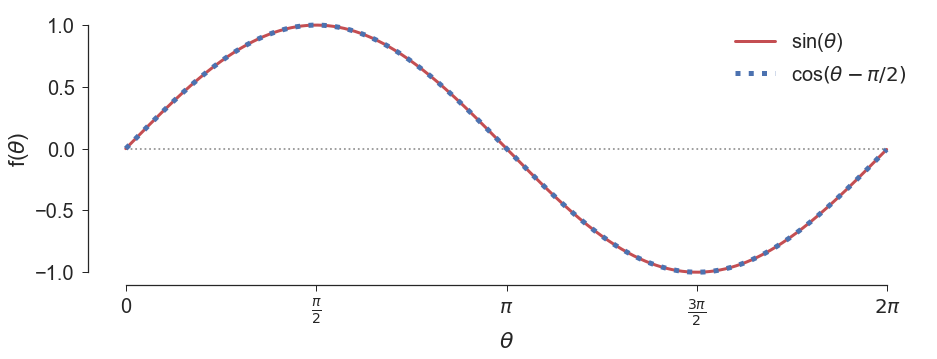

In [3]:
s = np.sin(th)
c = np.cos(th-np.pi/2)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot((th[0],th[-1]),(0,0),':',color=[.5,.5,.5,.85])
ax.set_xticks(np.arange(0,2*np.pi+.01,np.pi/2))
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])
la, = ax.plot(th,s,lw=3, color=red)
lb, = ax.plot(th,c,':',lw=5, color=blue)
ax.legend((la,lb),(r'sin($\theta$)',r'cos$\left(\theta-\pi/2\right)$'))
ax.set(xlabel=r'$\theta$',ylabel=r'f($\theta$)')
sb.despine(ax=ax,trim=True)

As we have seen in previous notebooks, changing the amplitude changes the maximum and minimum values the function reaches. Changing the frequency changes the rate at which the function repeats itself. And, as illustrated above, changing the phase shifts the function to the right or left.

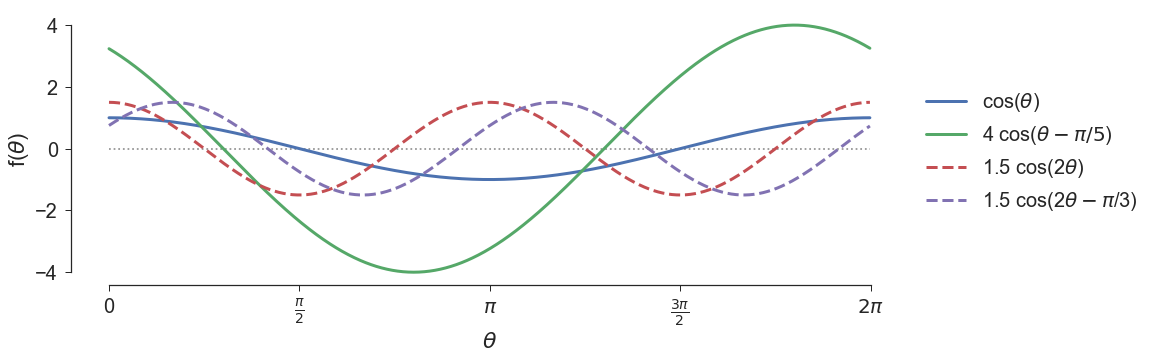

In [4]:
# make four cos signals with different frequencies, phases
c_a = np.cos(th)
c_b = 4*np.cos(th + np.pi/5)
c_c = 1.5*np.cos(2*th)
c_d = 1.5*np.cos(2*th - np.pi/3)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot((th[0],th[-1]),(0,0),':',color=[.5,.5,.5,.85])
ax.set_xticks(np.arange(0,2*np.pi+.01,np.pi/2))
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])
la, = ax.plot(th,c_a,lw=3)
lb, = ax.plot(th,c_b,lw=3)
lc, = ax.plot(th,c_c,'--',lw=3)
ld, = ax.plot(th,c_d,'--',lw=3)
ax.legend((la,lb,lc,ld),(r'cos($\theta$)',r'4 cos($\theta - \pi/5$)',r'1.5 cos(2$\theta$)',r'1.5 cos(2$\theta-\pi$/3)'),
         loc='upper left', bbox_to_anchor=(1,.78))
ax.set(xlabel=r'$\theta$',ylabel=r'f($\theta$)')
sb.despine(ax=ax,trim=True)

If we want to think in terms of time in seconds, which is often more intuitive, we can use a vector `t` ranging from, e.g., 0 to 1, and then we would express the frequency in Hz. We need to multiply the `t` vector by $2\pi$ (i.e., $\omega = 2\pi f_o$, where $f_o$ is the frequency in Hz), since the trigonometric functions assume the input is in radians:

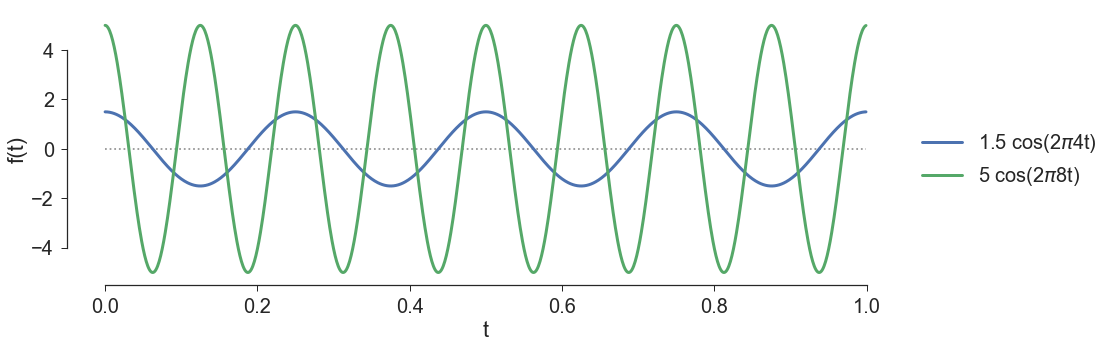

In [5]:
# time vector
t = np.linspace(start=0, stop=1, num=f_s, endpoint=False)
# multiply frequency by 2*pi
s = 1.5*np.cos(2*np.pi*4*t)
c = 5*np.cos(2*np.pi*8*t)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot((t[0],t[-1]),(0,0),':',color=[.5,.5,.5,.85])
la, = ax.plot(t,s,lw=3)
lb, = ax.plot(t,c,lw=3)
ax.legend((la,lb),('1.5 cos(2$\pi$4t)','5 cos(2$\pi$8t)'),loc='upper left', bbox_to_anchor=(1,.63))
ax.set(xlabel='t',ylabel=r'f(t)')
sb.despine(ax=ax,trim=True)

The signals we've generated thus far would all be pure tones if we saved them as wavefiles and listened to them. However, the frequency of all of them is below the lowest frequency that humans can hear. We can use what we have discussed so far to generate an audible pure tone:

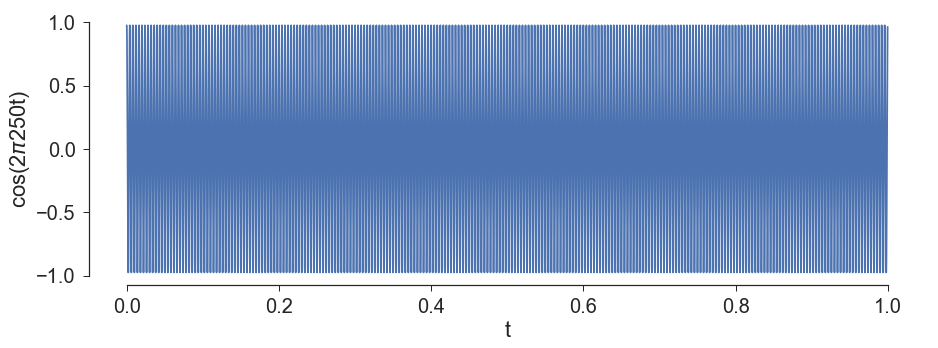

In [6]:
# use same time vector to make 250 Hz tone
fs_10k = 10000
tt = np.linspace(start=0,stop=1,num=fs_10k,endpoint=False)
f_o = 250
pt = .975*np.cos(2*np.pi*f_o*tt) # amplitude < 1 to avoid clipping
wv.write(filename='pure_tone.wav', rate=fs_10k, data=pt) # save pt as a wavefile
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tt,pt); ax.set(ylabel='cos(2$\pi$250t)',xlabel='t')
sb.despine(ax=ax,trim=True)

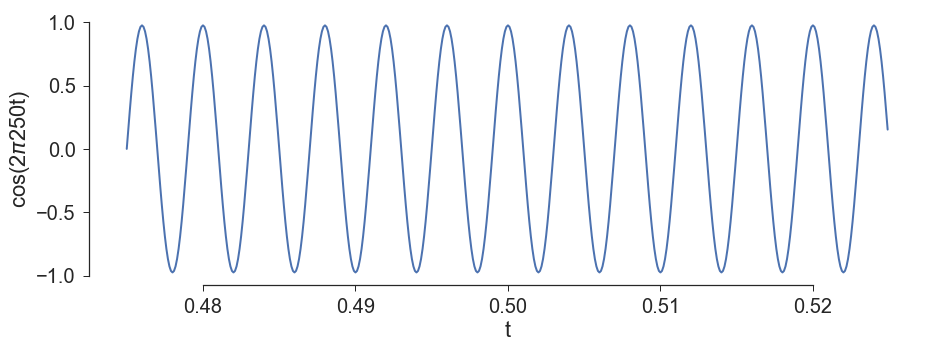

In [7]:
# plot just a part of the higher frequency sinusoid
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tt[4750:5250],pt[4750:5250], lw=2); ax.set(ylabel='cos(2$\pi$250t)',xlabel='t')
sb.despine(ax=ax,trim=True)

# Periodic sampling

All of the signal-processing data we'll be generating and/or analyzing will be periodically sampled. Sometimes we'll be analyzing sampled physical signals (e.g., digital representations of sounds). Other times we'll be creating sequences of sounds that are similarly structured. Periodic sampling (which we'll just call *sampling* from now on) is most easily understood via illustration.

First, let's define a couple terms: (sampling) frequency is the reciprocal of (sampling) period: $f_s = \displaystyle{\frac{1}{t_s}}$

So, let's start with a continuous sinusoidal physical signal: $x(t) = \cos(2\pi f_o t + \phi)$

If we sample this every $t_s$ seconds (i.e., with period $t_s$), we get $x[n] = \cos(2\pi f_o n t_s + \phi), n \in 
\{0, 1, 2, 3, ...\}$. So,

$\begin{align}
x[0] &= \cos(2\pi f_o 0 t_s + \phi)\\
x[1] &= \cos(2\pi f_o 1 t_s + \phi)\\
x[2] &= \cos(2\pi f_o 2 t_s + \phi)\\
x[3] &= \cos(2\pi f_o 3 t_s + \phi)\\
&\vdots
\end{align}$

We'll illustrate sampling with some figures. First create a time vector `t`, a "continuous" sinusoid `y`, and a sampled sinusoid `x`:

In [8]:
# signal frequency
fo = 2
# "continuous" time
t = np.linspace(0,1,1000, endpoint=False)
# sampling frequency and period
f_s = 10
t_s = 1/f_s
# "continuous" signal
y = np.cos(2*np.pi*fo*t + np.pi/3)
# initialize sampled signal and time points
n,x = [],[]
# ni iterates through the list [0, 1, ..., fs]
for ni in range(f_s):
    n.append(ni) # sample ni
    x.append(np.cos(2*np.pi*fo*ni*t_s + np.pi/3)) # sampled cosine for sample ni
x = np.array(x)
n = np.array(n)

Plot the samples by themselves:

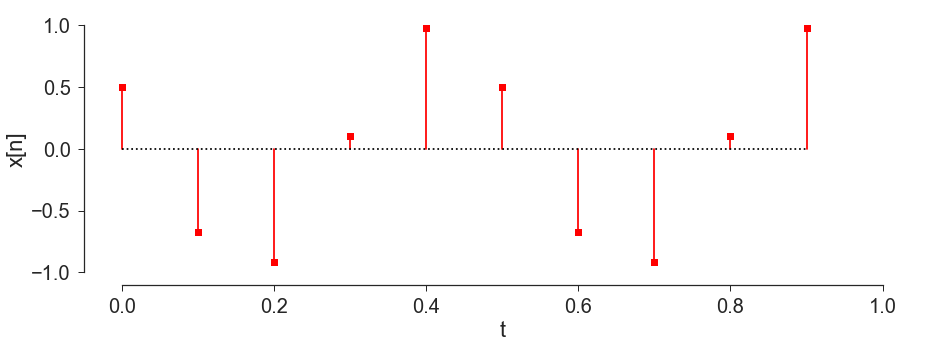

In [9]:
# plot just the samples
fig, ax = pl.subplots(1,1,figsize=(15,5))
ml, sl, bl = ax.stem(n/f_s,x,linefmt='r-',markerfmt='rs',basefmt='k:')
ax.set(ylim=(-1.1,1.1),xlim=(-.05,1.05),xlabel='t',ylabel='x[n]')
sb.despine(ax=ax, trim=True)

And here are the samples along with the "continuous" signal:

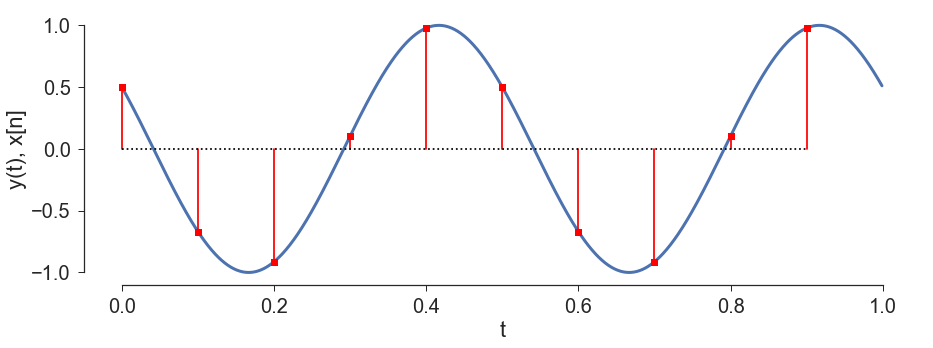

In [10]:
# plot the samples and the "continuous" signal
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(t,y,lw=3, color=blue)
ax.stem(n/f_s,x,linefmt='r-',markerfmt='rs',basefmt='k:')
ax.set(ylim=(-1.1,1.1),xlim=(-.05,1.05),xlabel='t',ylabel='y(t), x[n]')
sb.despine(ax=ax, trim=True)

A crucial fact about sampling is that it produces some ambiguity. Because `sin()` and `cos()` are periodic, with period $2\pi$, for any integer $m$:

$\cos(2\pi f_o n t_s) = \cos(2\pi f_o n t_s + 2\pi m) = \cos\left(2\pi \left(f_o + \displaystyle{\frac{m}{nt_s}} \right) nt_s\right)$

If we let $m = kn$, this equals $\cos\left(2\pi \left(f_o + \displaystyle{\frac{k}{t_s}} \right)nt_s\right) =  \cos\left(2\pi \left(f_o + kf_s \right) nt_s \right)$

The point is that the original frequency $f_o$ *plus any integer multiple of the sampling frequency* will produce exactly the same samples as our original signal.

Here is an illustration of this fact, showing that the samples illustrated above could have come from either the original signal or a signal with frequency $f_o + kf_s$ (we can play around with $k$ to convince ourselves that it works for any integer multiple of the sampling frequency):

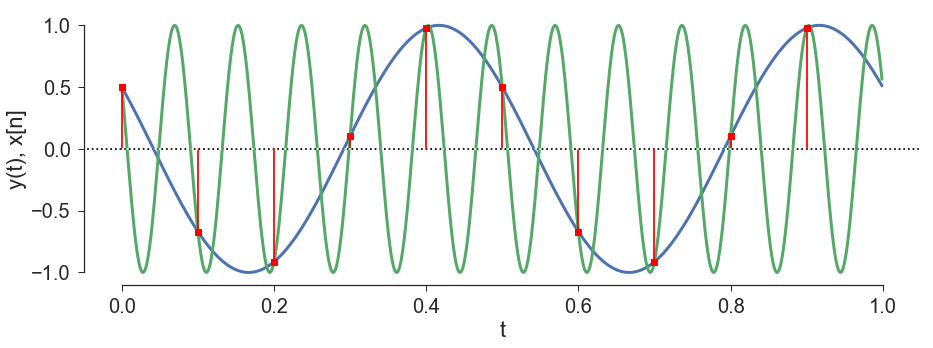

In [11]:
# create "aliased" signal, with fa = fo + k*fs
fa = fo + 1*f_s
y2 = np.cos(2*np.pi*fa*t + np.pi/3)

fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot([-1.1,1.1],[0,0],'k:')
ax.set(ylim=(-1.1,1.1),xlim=(-.05,1.05),xlabel='t',ylabel='y(t), x[n]')
ax.plot(t,y,lw=3)
ax.plot(t,y2,lw=3)
ax.stem(n/f_s,x,linefmt='r-',markerfmt='rs',basefmt='w:')
sb.despine(ax=ax, trim=True)

So, different frequencies in a continuous signal can produce identical samples in a discrete-time counterpart to the physical signal. When a higher-frequency signal looks like a lower-frequency signal in a sampled sequence of values, this is called *aliasing*. We will return to this issue after we've discussed spectral representations of signals.

For now, I will just note that $\displaystyle{\frac{f_s}{2}}$ is known as the Nyquist frequency. This is a special value that you should always keep in the back of your mind. When you sample a signal with a sampling frequency of $f_s$, the highest frequency you can accurately represent in your sampled signal is $\displaystyle{\frac{f_s}{2}}$. Any frequency in the signal that is above the Nyquist frequency will be aliased onto a frequency below the Nyquist frequency.

This is illustrated in the figure above for $f_o = 2$, $f_s = 10$, and $f_a = f_o + f_s$. The frequency $f_a$ shows up as $f_o$ in the sampled signal, due to aliasing.

## The discrete Fourier transform

The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) is a tool for decomposing a signal into its component parts. More specifically, it takes a signal in the *time domain* and represents it in the *frequency domain*. Thus far, we've looked at signals only in the time domain (e.g., when we made sinusoids using a time vector `t` above).

([Here](https://www.youtube.com/watch?v=spUNpyF58BY) is a nice new video explaining the Fourier transform visually.)

The *discrete* Fourier transform (DFT) is a special case of the Fourier transform that is used with discrete-time signals (i.e., sampled time-domain signals). The DFT is extremely common and extremely useful in digital signal processing.

The definition of the DFT is given below. It's kind of complicated, so we'll unpack it in some detail to try build our intuitions about how the time domain and the frequency domain are related. (The following description and illustration of the DFT is based on Richard Lyons' presentation of the DFT in [Understanding Digitial Signal Processing](https://www.amazon.com/Understanding-Digital-Signal-Processing-3rd/dp/0137027419), which is an excellent introductory DSP book.)

Here is the definition of the DFT:

$\begin{equation}X[m] = \displaystyle{\sum_{n=0}^{N-1} x[n] \exp\left(\frac{-i 2 \pi n m}{N}\right)}\end{equation}$

Here are the individual parts of the equation with some explanation:

$x[n]$ is just a sequence of samples from whatever signal we're interested in analyzing (e.g., a vector of samples from a sound file, from neural recordings, etc...)

$\exp(\theta)$ is the exponential function, i.e., $e^\theta$, where $e \approx 2.718$ ([more here](http://en.wikipedia.org/wiki/E_%28mathematical_constant%29), if you're interested).

You know what [$\pi$](http://en.wikipedia.org/wiki/Pie) is, I assume.

$n$ is the index of the *time domain* sequence $x[n]$. That is, $n$ tells us where a given sample is with respect to time.

$m$ is the index of the *frequency domain* sequence $X[m]$. That is, $m$ tells us where a given sample is with respect to frequency.

$N$ is the number of samples we're dealing with in any particular DFT. Note that the number of samples in the time domain signal is equal to the number of samples in the frequency domain transform.

$i = \sqrt{-1}$, or, equivalently, $i^2 = -1$, and its presence indicates that we're dealing with complex numbers. Sometimes $j$ is used instead of $i$.

When $e$ shows up with a power of $i$, it is called a *complex exponential* function, and it is defined, via [Euler's equation](https://en.wikipedia.org/wiki/Euler's_identity), as:

$\exp(i \theta) = \cos(\theta) + i\sin(\theta)$

If the $i$ is negative, it's the *complex conjugate* of the form with positive $i$:

$\exp(-i \theta) = \cos(\theta) - i\sin(\theta)$

Euler's equation implies that the DFT equation can also be written as:

$\begin{equation}X[m] = \displaystyle{\sum_{n=0}^{N-1} x[n] \left[ \cos\left(\frac{2 \pi n m}{N}\right) - i\sin\left(\frac{2 \pi n m}{N}\right)\right]}\end{equation}$

As we will illustrate below, this way of writing the DFT shows that it is an expression of correlations (cross-products) between a time domain signal $x[n]$ and sinusoids of various frequencies.

### A very short primer on complex numbers:

A complex number has the form $x = a + ib$, where, again, $i^2 = -1$. We say that $a$ is the real part and $b$ is the imaginary part.

To add two complex numbers, just add the real and imaginary parts: $(a + ib) + (c + id) = (a+c) + i(b+d)$

To multiply two complex numbers, act like you're multiplying polynomials: $(a + ib)(c + id) = ac + iad + ibc  - bd = (ac-bd) + i(ad + bc)$.

Multiplying complex exponentials (as in the DFT equation above) is easier: $\big(\cos(\theta) + i\sin(\theta)\big)\big(\cos(\gamma) + i\sin(\gamma)\big) = e^{i\theta}e^{i\gamma} = e^{i(\theta + \gamma)}$

The magnitude of a complex number is $|x| = \sqrt{a^2 + b^2}$. Note that the square root of the product of a complex number and it's complex conjugate produces the magnitude, since $(a + ib)(a - ib) = a^2 - iab + iab - i^2 b^2 = a^2 + b^2$.

The phase angle of a complex number is $\displaystyle{x_\phi = \tan^{-1}\left(\frac{b}{a}\right)}$

It's useful to plot complex numbers in a 2D space where the x axis is the real part ($a$) and the y axis is the imaginary part ($b$):

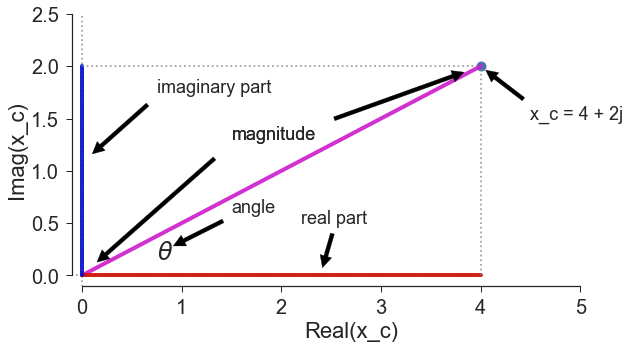

In [12]:
fig, ax = pl.subplots(1,1,figsize=(10,5))
x_c = 4 + 2j # create a complex number
# plot x and y axes as dotted lines
ax.plot([0,0],[-.2,4],':',color=[.5,.5,.5,.75])
ax.plot([-.2,4],[0,0],':',color=[.5,.5,.5,.75])
# plot real and imaginary parts, plot magnitude and angle
ax.plot(x_c.real,x_c.imag,'o',markersize=10)
ax.plot([0,x_c.real],[0,x_c.imag],'-',lw=4,color=[.8,.1,.8,.9])
ax.plot([0,x_c.real],[0,0],'-',lw=4,color=[.8,.05,0,.9])
ax.plot([0,0],[0,x_c.imag],'-',lw=4,color=[0,.05,.8,.9])
ax.plot([0,x_c.real],[x_c.imag,x_c.imag],':',color=[.5,.5,.5,.75])
ax.plot([x_c.real,x_c.real],[0,x_c.imag],':',color=[.5,.5,.5,.75])
ax.text(.75,.15,r'$\theta$',fontsize=24)
# fiddle with the axes to make labels and set limits and such
ax.set(ylabel='Imag(x_c)',xlabel='Real(x_c)',xlim=(-.1,5.5),ylim=(-.1,2.5))
# add annotations
ap = dict(facecolor='black',shrink=.1)
ax.annotate('x_c = 4 + 2j',xy=(x_c.real,x_c.imag),xytext=(4.5,1.5),arrowprops=ap,fontsize=18)
ax.annotate('magnitude',xy=(x_c.real,x_c.imag),xytext=(x_c.real-2.5,x_c.imag-.7),arrowprops=ap,fontsize=18)
ax.annotate('magnitude',xy=(0,0),xytext=(x_c.real-2.5,x_c.imag-.7),arrowprops=ap,fontsize=18)
ax.annotate('real part',xy=(2.4,0.03),xytext=(2.2,.5),arrowprops=ap,fontsize=18)
ax.annotate('imaginary part',xy=(0.03,1.1),xytext=(.75,1.75),arrowprops=ap,fontsize=18)
ax.annotate('angle',xy=(.85,.25),xytext=(1.5,.6),arrowprops=ap,fontsize=18)
sb.despine(ax=ax,trim=True)

### Back to the DFT

It is helpful to see the full, expanded DFT equation for the first few terms of a simple example. So, suppose we have the following signal $x[n]$ sampled at $f_s = 8000$ Hz:

$x[n] = \sin(2\pi 1000 t) + 0.5\sin(2\pi 3000 t + 3\pi/4)$

Here's what the first two milliseconds of this signal look like, in (fake) continuous form and in the sampled form we'll be analyzing:

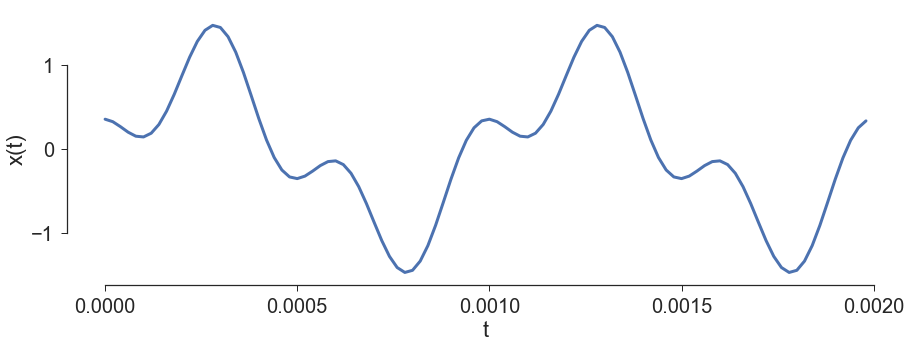

In [13]:
# a "continuous" looking version of x
fs = 50000 # set sampling frequency
sc = .002 # two milliseconds as a fraction of a second
nsmp = int(fs*sc) # the number of samples in two milliseconds
tc = np.linspace(0,sc,nsmp,endpoint=False)
# the signal of interest
x = np.sin(2*np.pi*1000*tc) + .5*np.sin(2*np.pi*3000*tc + 3*np.pi/4)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tc,x,lw=3); sb.despine(ax=ax,trim=True); ax.set(xlabel='t',ylabel='x(t)', xticks=np.linspace(0,.002,5));

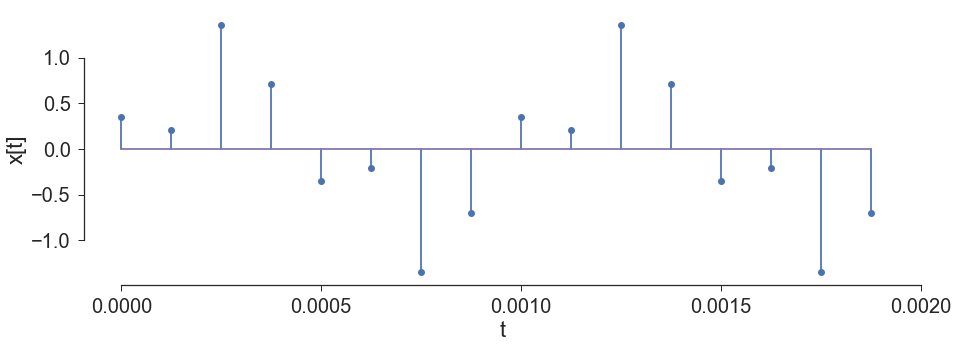

In [14]:
# the discrete-time signal we'll actually analyze
# set sampling frequency
fs = 8000
# number of samples in two milliseconds
nsmp = int(fs*sc)
# discrete time vector
td = np.linspace(0,sc,nsmp,endpoint=False)
# the sampled signal of interest
x = np.sin(2*np.pi*1000*td) + .5*np.sin(2*np.pi*3000*td + 3*np.pi/4)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.stem(td,x); ax.set(xlabel='t',ylabel='x[t]', xticks=np.linspace(0,.002,5)); sb.despine(ax=ax,trim=True);

Now, suppose we want to calculate the 8-point DFT for the first 8 samples of $x[n]$. We're going to apply the DFT equation above to the first 8 samples of $x[n]$, and we'll get 8 samples in the frequency domain. That is, we'll get an 8-point sequence that provides us with information about the frequency and phase of the components of $x[n]$.

If we expand the DFT equation above for the first element of $X[m]$, we get:

$\begin{align}
X[0] &= \displaystyle{\sum_{n=0}^{7} x[n] \left[ \cos(2 \pi \cdot n \cdot 0/N) - i\sin(2 \pi \cdot n \cdot 0/N)\right]}\\
&= x[0]\cos(2\pi \cdot 0 \cdot 0 / 8) - ix[0]\sin(2\pi \cdot 0 \cdot 0 /8 )\\
&\quad + x[1]\cos(2\pi \cdot 1 \cdot 0 / 8) - ix[1]\sin(2\pi \cdot 1 \cdot 0 /8 )\\
&\quad + x[2]\cos(2\pi \cdot 2 \cdot 0 / 8) - ix[2]\sin(2\pi \cdot 2 \cdot 0 /8 )\\
&\quad + x[3]\cos(2\pi \cdot 3 \cdot 0 / 8) - ix[3]\sin(2\pi \cdot 3 \cdot 0 /8 )\\
&\quad + x[4]\cos(2\pi \cdot 4 \cdot 0 / 8) - ix[4]\sin(2\pi \cdot 4 \cdot 0 /8 )\\
&\quad + x[5]\cos(2\pi \cdot 5 \cdot 0 / 8) - ix[5]\sin(2\pi \cdot 5 \cdot 0 /8 )\\
&\quad + x[6]\cos(2\pi \cdot 6 \cdot 0 / 8) - ix[6]\sin(2\pi \cdot 6 \cdot 0 /8 )\\
&\quad + x[7]\cos(2\pi \cdot 7 \cdot 0 / 8) - ix[7]\sin(2\pi \cdot 7 \cdot 0 /8 )\\
\end{align}$

Since $\cos(0) = 1$ and $\sin(0) = 0$, this first term - $X[0]$ - is just the sum of the first 8 samples of $x[n]$.

The second element of the DFT - $X[1]$ - is given by:

$\begin{align}
X[1] &= \displaystyle{\sum_{n=0}^{7} x[n] \left[ \cos(2 \pi \cdot n \cdot 1/N) - i\sin(2 \pi \cdot n \cdot 1/N)\right]}\\
&= x[0]\cos(2\pi \cdot 0 \cdot 1 / 8) - ix[0]\sin(2\pi \cdot 0 \cdot 1 /8 )\\
&\quad + x[1]\cos(2\pi \cdot 1 \cdot 1 / 8) - ix[1]\sin(2\pi \cdot 1 \cdot 1 /8 )\\
&\quad + x[2]\cos(2\pi \cdot 2 \cdot 1 / 8) - ix[2]\sin(2\pi \cdot 2 \cdot 1 /8 )\\
&\quad + x[3]\cos(2\pi \cdot 3 \cdot 1 / 8) - ix[3]\sin(2\pi \cdot 3 \cdot 1 /8 )\\
&\quad + x[4]\cos(2\pi \cdot 4 \cdot 1 / 8) - ix[4]\sin(2\pi \cdot 4 \cdot 1 /8 )\\
&\quad + x[5]\cos(2\pi \cdot 5 \cdot 1 / 8) - ix[5]\sin(2\pi \cdot 5 \cdot 1 /8 )\\
&\quad + x[6]\cos(2\pi \cdot 6 \cdot 1 / 8) - ix[6]\sin(2\pi \cdot 6 \cdot 1 /8 )\\
&\quad + x[7]\cos(2\pi \cdot 7 \cdot 1 / 8) - ix[7]\sin(2\pi \cdot 7 \cdot 1 /8 )\\
\end{align}$

And the third - $X[2]$ - is given by:

$\begin{align}
X[2] &= \displaystyle{\sum_{n=0}^{7} x[n] \left[ \cos(2 \pi \cdot n \cdot 2/N) - i\sin(2 \pi \cdot n \cdot 2/N)\right]}\\
&= x[0]\cos(2\pi \cdot 0 \cdot 2 / 8) - ix[0]\sin(2\pi \cdot 0 \cdot 2 /8 )\\
&\quad + x[1]\cos(2\pi \cdot 1 \cdot 2 / 8) - ix[1]\sin(2\pi \cdot 1 \cdot 2 /8 )\\
&\quad + x[2]\cos(2\pi \cdot 2 \cdot 2 / 8) - ix[2]\sin(2\pi \cdot 2 \cdot 2 /8 )\\
&\quad + x[3]\cos(2\pi \cdot 3 \cdot 2 / 8) - ix[3]\sin(2\pi \cdot 3 \cdot 2 /8 )\\
&\quad + x[4]\cos(2\pi \cdot 4 \cdot 2 / 8) - ix[4]\sin(2\pi \cdot 4 \cdot 2 /8 )\\
&\quad + x[5]\cos(2\pi \cdot 5 \cdot 2 / 8) - ix[5]\sin(2\pi \cdot 5 \cdot 2 /8 )\\
&\quad + x[6]\cos(2\pi \cdot 6 \cdot 2 / 8) - ix[6]\sin(2\pi \cdot 6 \cdot 2 /8 )\\
&\quad + x[7]\cos(2\pi \cdot 7 \cdot 2 / 8) - ix[7]\sin(2\pi \cdot 7 \cdot 2 /8 )\\
\end{align}$

And so on. For element $m$ of the DFT, we are calculating the correlation between our input signal $x[n]$ and *analysis frequencies* corresponding to the $m$ indices. The actual frequency values indexed by $m$ are given by $\displaystyle{m\frac{f_s}{N}}$, so, e.g., when $m = 1$, we're gathering information about the analysis frequency $f_a = \displaystyle{1\cdot\frac{8000}{8}} = 1000$ Hz. When $m = 2$, we're dealing with $\displaystyle{2\cdot\frac{8000}{8}} = 2000$ Hz, and so on.

Some figures will help to illustrate what's going on here. First, we'll set up "continuous" and discrete time vectors and signals:

In [15]:
# one ms as a fraction of a second (rather than two)
sc = .001
# "continuous" time
fs = 100000
# number of samples in one ms
nsmp = int(fs*sc)
# "continuous" time vector
tc = np.linspace(0,sc,nsmp,endpoint=False)
# signal
xc = np.sin(2*np.pi*1000*tc) + .5*np.sin(2*np.pi*3000*tc + 3*np.pi/4)
# discrete time
fs = 8000
# number of samples in one ms
nsmp = int(fs*sc)
# discrete time vector
td = np.linspace(0,sc,nsmp,endpoint=False)
# signal
xd = np.sin(2*np.pi*1000*td) + .5*np.sin(2*np.pi*3000*td + 3*np.pi/4)

When $m = 1$, our analysis frequency is 1000 Hz, so when we calculate the DFT equation, we calculate the correlation between the 8 samples of our signal and analysis sinusoids (cosines and sines) with frequency 1000 Hz (i.e., one complete cycle in the 8 samples we're looking at):

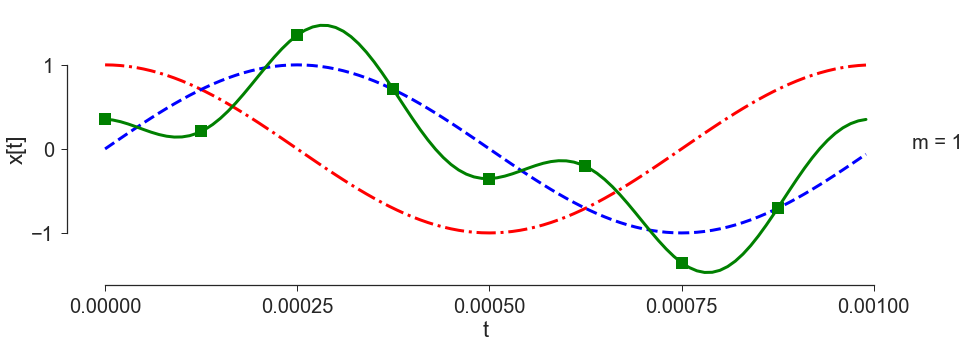

In [16]:
# m = 1, f_a = 1000 Hz
# number of points in time and frequency domains
N = 8
# analytic signals for m = 1 -> 1000 Hz
cosine = np.cos(2*np.pi*1000*tc)
sine = np.sin(2*np.pi*1000*tc)
# plot analytic signals and input signal x
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tc,cosine,'r-.',lw=3)
ax.plot(tc,sine,'b--',lw=3)
ax.plot(tc,xc,'g-',lw=3)
ax.plot(td,xd,'gs',ms=12)
ax.text(.00105,0,'m = 1', fontsize=20)
ax.set(xlabel='t',ylabel='x[t]', xticks=np.linspace(0,.001,5)); sb.despine(ax=ax,trim=True);

When $m = 2$, our analysis frequency is 2000 Hz, so we're calculating the correlation with analysis sinusoids with frequency 2000 Hz (i.e., two complete cycles in our 8 samples):

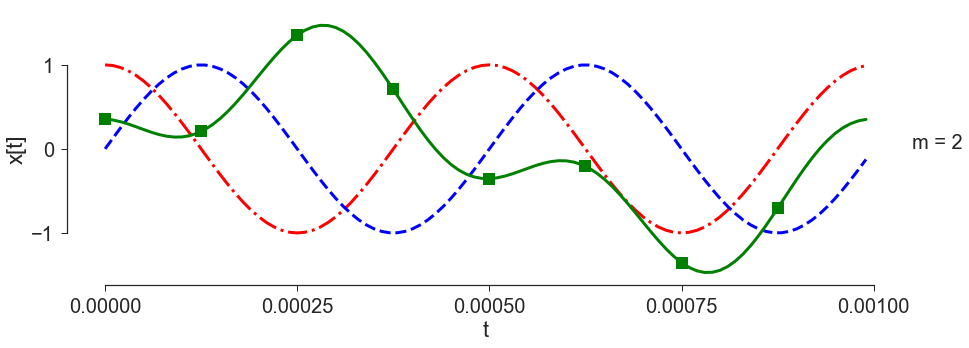

In [17]:
# analytic signals for m = 2 -> 2000 Hz
cosine = np.cos(2*np.pi*2000*tc)
sine = np.sin(2*np.pi*2000*tc)
# plot analytic signals and input signal x
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tc,cosine,'r-.',lw=3)
ax.plot(tc,sine,'b--',lw=3)
ax.plot(tc,xc,'g-',lw=3)
ax.plot(td,xd,'gs',ms=12)
ax.text(.00105,0,'m = 2', fontsize=20)
ax.set(xlabel='t',ylabel='x[t]', xticks=np.linspace(0,.001,5)); sb.despine(ax=ax,trim=True);

The pattern continues for $m = 3, 4, 5, 6, 7$ (we're ignoring $m=0$ for now):

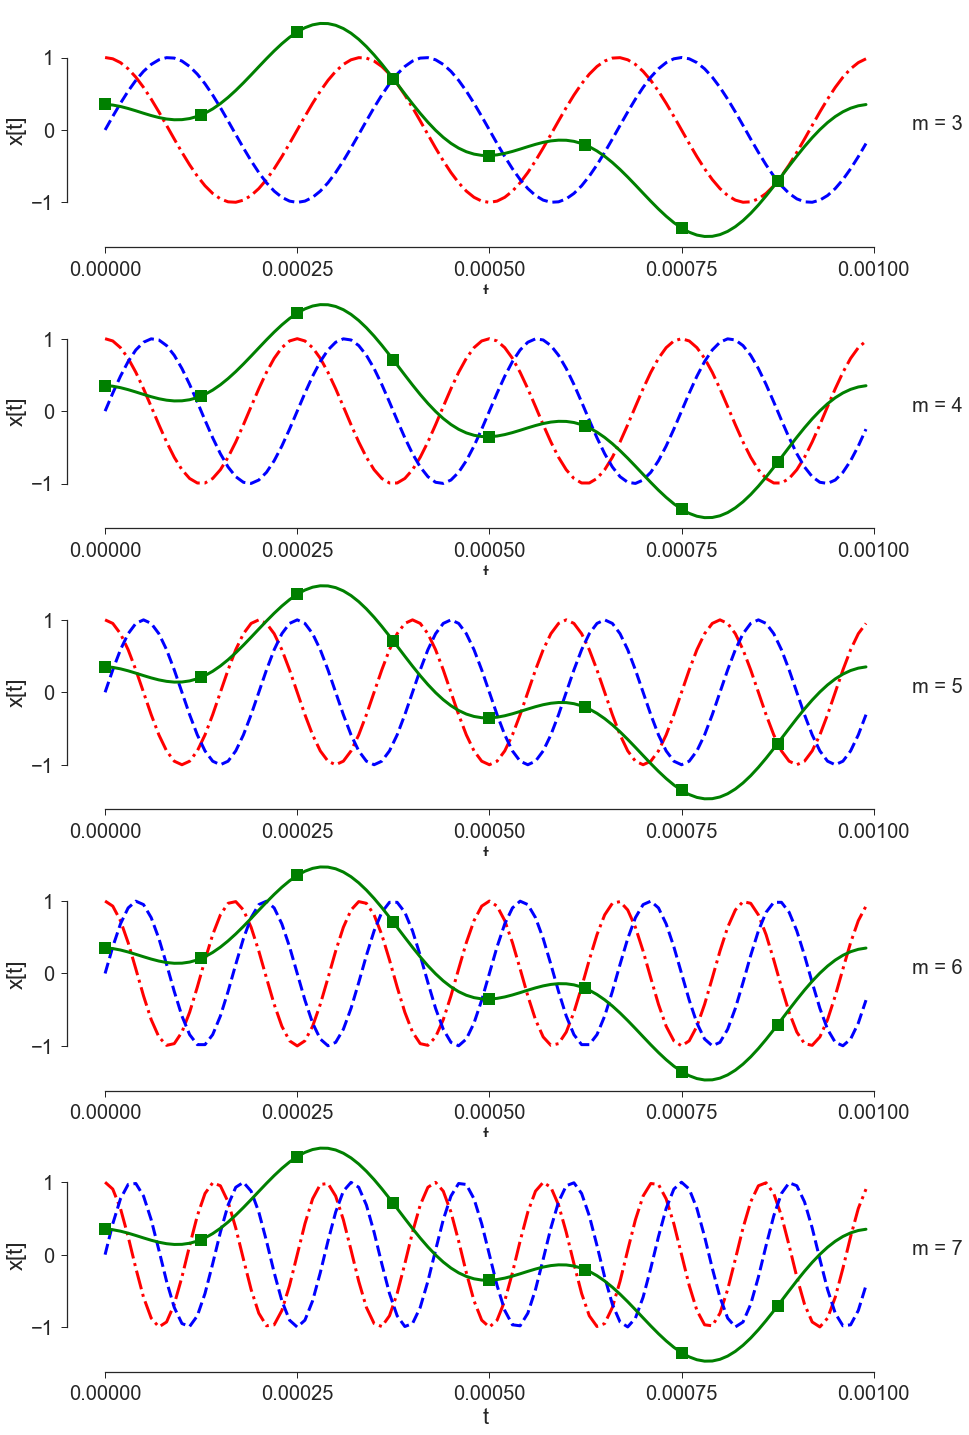

In [18]:
fig, axes = pl.subplots(5,1,figsize=(15,25))

for fi in range(3,8):
    cosine = np.cos(2*np.pi*fi*1000*tc)
    sine = np.sin(2*np.pi*fi*1000*tc)
    # plot analytic signals and input signal x
    ax = axes[fi-3]
    ax.plot(tc,cosine,'r-.',lw=3)
    ax.plot(tc,sine,'b--',lw=3)
    ax.plot(tc,xc,'g-',lw=3)
    ax.plot(td,xd,'gs',ms=12)
    ax.text(.00105,0,'m = ' + str(fi), fontsize=20)
    ax.set(xlabel='t',ylabel='x[t]', xticks=np.linspace(0,.001,5)); sb.despine(ax=ax,trim=True);

Here's an unnecessary function for calculating the DFT of a sequence (we'll see why it's unnecessary below):

In [19]:
# define function for calculating DFT
def DFT(x_in,N):
    M = N # set M (points in freq. domain) equal to N (points in time domain)
    Xm = np.zeros(M,dtype=complex) # initialize DFT output vector; note data type
    t = np.linspace(0,1,N,endpoint=False) # create discrete time vector, N points long
    for mi in range(M): # loop through points in freq. domain
        # create analytic signals
        c = np.cos(2*np.pi*mi*t)
        s = np.sin(2*np.pi*mi*t)
        # calculate correlations between input and analytic signals
        Xm[mi] = np.sum(x_in*c - x_in*1j*s)
    # return the calculated DFT
    return Xm

Recall that `xd` is our 8-point time-domain sequence. We'll use (upper case) `Xd` for the frequency domain representation of our time domaain signal:

In [20]:
Xd = DFT(xd,8)

And now let's look at what we get from our DFT function:

In [21]:
Xd

array([-7.77156117e-16+0.00000000e+00j,  2.22044605e-16-4.00000000e+00j,
        1.14423775e-17+2.28847549e-17j,  1.41421356e+00+1.41421356e+00j,
       -3.33066907e-16-3.88405657e-16j,  1.41421356e+00-1.41421356e+00j,
        1.14555317e-15+9.56832684e-16j, -2.66453526e-15+4.00000000e+00j])

Because the DFT gives us a vector of complex numbers, we can't just plot the DFT directly. Typically, we plot the power (or magnitude) and/or the phase. The power is equal to the magnitude squared.

Recall that the magnitude is: $\big|X[m]\big| = \sqrt{X_{real}^2[m] + X_{imag}^2[m]}$

So, the power is $\big|X[m]\big|^2 = X_{real}^2[m] + X_{imag}^2[m]$

Since $(a + ib)(a - ib) = a^2 - iab + iab - i^2 b^2 = a^2 + b^2$, We can get the power at each analysis frequency by multiplying `Xd` and the complex conjugate of `Xd`.

We can use the method `conj()` to get the complex conjugate of `Xd`:

In [22]:
Xd.conj()

array([-7.77156117e-16-0.00000000e+00j,  2.22044605e-16+4.00000000e+00j,
        1.14423775e-17-2.28847549e-17j,  1.41421356e+00-1.41421356e+00j,
       -3.33066907e-16+3.88405657e-16j,  1.41421356e+00+1.41421356e+00j,
        1.14555317e-15-9.56832684e-16j, -2.66453526e-15-4.00000000e+00j])

In [23]:
(Xd*Xd.conj())

array([6.03971631e-31+0.j, 1.60000000e+01+0.j, 6.54640009e-34+0.j,
       4.00000000e+00+0.j, 2.61792519e-31+0.j, 4.00000000e+00+0.j,
       2.22782086e-30+0.j, 1.60000000e+01+0.j])

Note that the datatype is still complex, so even though the imaginary part of each element of `Xd` is 0, it's still represented in the array. We can use the method `real()` to get just the real parts, and we can take the square root to get the magnitude (rather than the power):

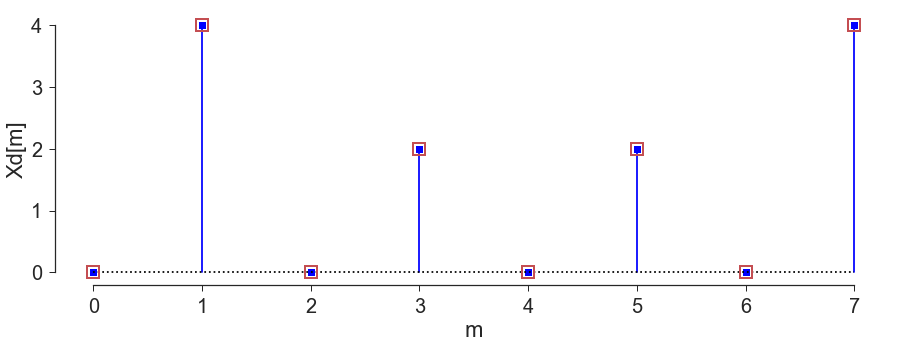

In [24]:
# sqrt((Xd*Xd.conj()).real) is the same as np.abs(Xd)
fig, ax = pl.subplots(1,1,figsize=(15,5))
magnitude = np.sqrt((Xd*Xd.conj()).real)
ax.stem(magnitude, linefmt='b-',markerfmt='bs',basefmt='k:')
ax.plot(np.abs(Xd),'s', color=red, ms=12, mfc='none', mew=2)
ax.set(xlabel='m', ylabel='Xd[m]')
sb.despine(ax=ax,trim=True)

Recall that our frequency bins (i.e., our analysis frequencies) are given by $f_a = mf_s/N =$ 0 Hz, 1000 Hz, 2000 Hz, ...

Hence, the figure above is showing us that our signal has components at 1000 Hz and 2000 Hz ($m = 1, 2$). It also seems to be showing us that there are components at 6000 Hz and 7000 Hz. But recall our discussion about the Nyquist frequency (i.e., $f_s/2$) and aliasing. The highest frequency we can represent in a signal sampled at 8000 Hz is 4000 Hz.

Because our signal was real (i.e., did not have an imaginary component), the DFT is symmetric, i.e.: $\big|X[m]\big| = \big|X[N-m]\big|$

In fact, the magnitude of a DFT is a periodic function. If we were to continue the plot above either to the right or the left, we would just see repetitions of the same pattern we see over the 8 points shown above.

The main point here is that when we calculate the DFT of a real signal, we really just need to deal with the first $N/2$ components of the DFT.

Here's a quick summary of some other properties of the DFT:

The real part is even: $X_{real}[m] = X_{real}[-m]$

The imaginary part is odd: $-X_{imag}[m] = X_{imag}[-m]$

The phase angle is also odd: $-X_\phi[m] = X_\phi[-m]$

Here are the real and imaginary parts of `Xd`:

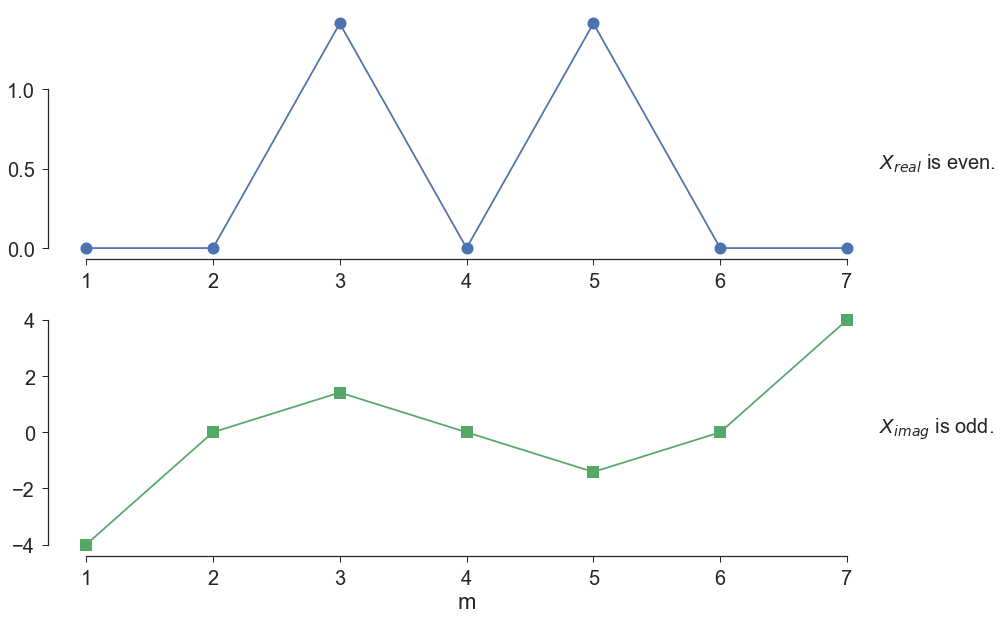

In [25]:
fig, axes = pl.subplots(2,1,figsize=(15,10)); ax1, ax2 = axes
ax1.plot(np.arange(1,8),Xd.real[1:],'o-', color=blue, ms=12); ax1.text(7.25,0.5,'$X_{real}$ is even.', fontsize=20)
ax2.plot(np.arange(1,8),Xd.imag[1:],'s-', color=green, ms=12); ax2.text(7.25,0,'$X_{imag}$ is odd.', fontsize=20)
ax2.set(xlabel='m')
[sb.despine(ax=axes[i],trim=True) for i in range(2)];

### Using built-in Fourier transform tools
Thankfully, there are lots of built in functions for efficiently calculating DFTs (and various related functions), so we don't need to define or use our own DFT functions like the one above. The [scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html) module has lots of useful stuff, including a "fast Fourier transform" function `fft()`:

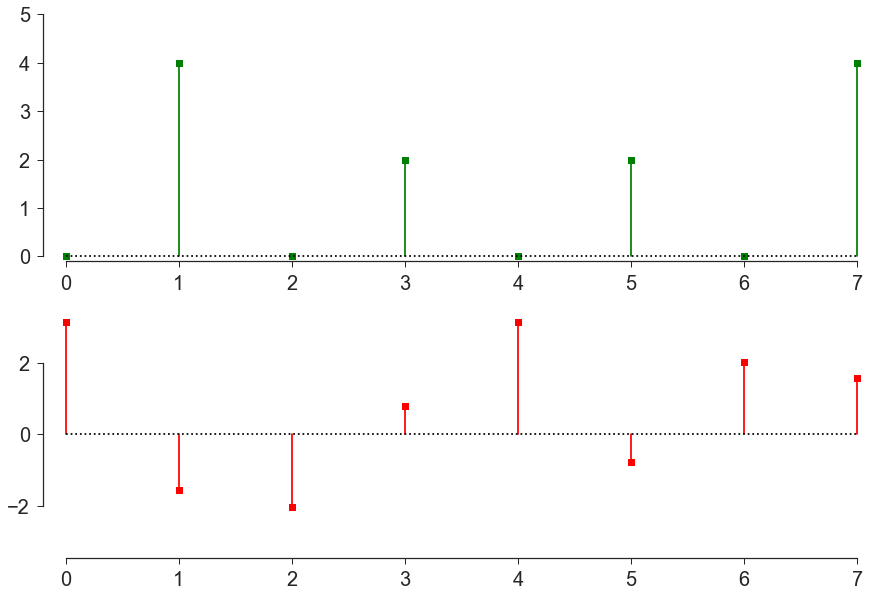

In [26]:
from scipy.fftpack import fft

# more efficient version of the DFT analysis above
Xf = fft(xd)

fig, axes = pl.subplots(2,1,figsize=(15,10))
ax1,ax2 = axes

# magnitude
ax1.stem(np.abs(Xf), linefmt='g-',markerfmt='gs',basefmt='k:')
ax1.set(xlim=(-.2,7.2),ylim=(-.1,5))
sb.despine(ax=ax1,trim=True)

# phase angle
ax2.stem(np.angle(Xf), linefmt='r-',markerfmt='rs',basefmt='k:')
ax2.set(xlim=(-.2,7.2),ylim=(-1.1*np.pi,1.1*np.pi))
sb.despine(ax=ax2,trim=True)

## Leakage in the DFT

In the example above, the sampling frequency, the frequency of the components in the signal, and the number of points we used in the DFT were chosen carefully to match up and produce nice, clean results. The sampling frequency was 8000 Hz, the two components in the signal were 1000 Hz and 3000 Hz, and the bins in our DFT were at 0 Hz, 1000 Hz, 2000 Hz, 3000 Hz, etc... When everything lines up nice like this, all of the correlations that go into the DFT are zero if the analysis frequencies don't match the frequencies of the components in the signal.

Most of the time, of course, things don't line up so nicely. So, for example, if we have a signal with a frequency that doesn't line up nicely with our analysis frequencies, we get "leakage".

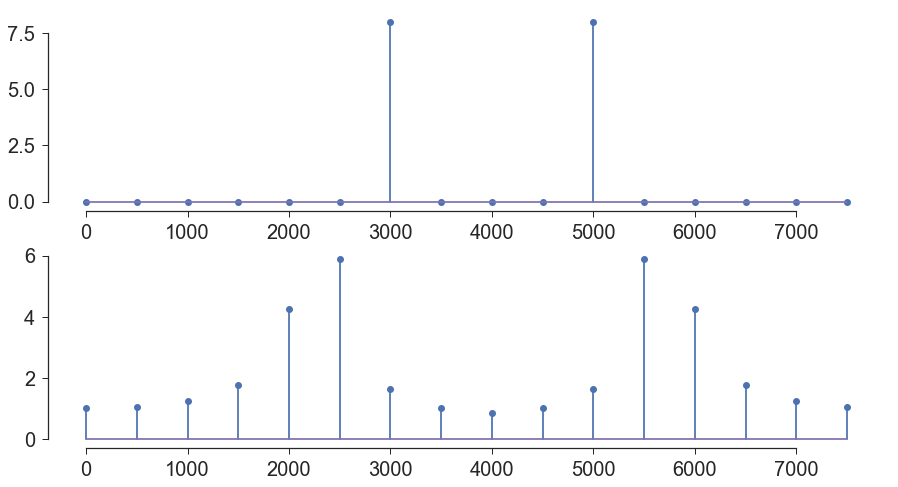

In [27]:
# set parameters to illustrate leakage
fs = 8000 # sampling frequency
N = 16 # number of points
td = np.linspace(0,N/fs,N,endpoint=False) # first N points of discrete time vector

x1 = np.sin(2*np.pi*3000*td) # signal with "good" frequency
X1 = fft(x1,N) # FFT of "good" signal

x2 = np.sin(2*np.pi*2300*td) # signal with frequency that doesn't match up with FFT bins
X2 = fft(x2,N) # FFT of "bad" signal

# plot spectra; note use of arange() to create frequency vectors for plotting
fig, axes = pl.subplots(2,1,figsize=(15,8)); ax1,ax2 = axes
ax1.stem(np.arange(0,fs,fs/N),np.absolute(X1))
ax2.stem(np.arange(0,fs,fs/N),np.absolute(X2))
sb.despine(ax=ax1,trim=True); sb.despine(ax=ax2,trim=True)

We can minimize the extent of leakage if we use window functions in the time domain prior to taking the DFT.

Or, more accurately, we've been using a rectangular window function so far, and we can minimize leakage if we use other window functions.

The module [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#window-functions) has a number of window functions. Here's a very brief illustration of the use a common window function called the Hamming window.

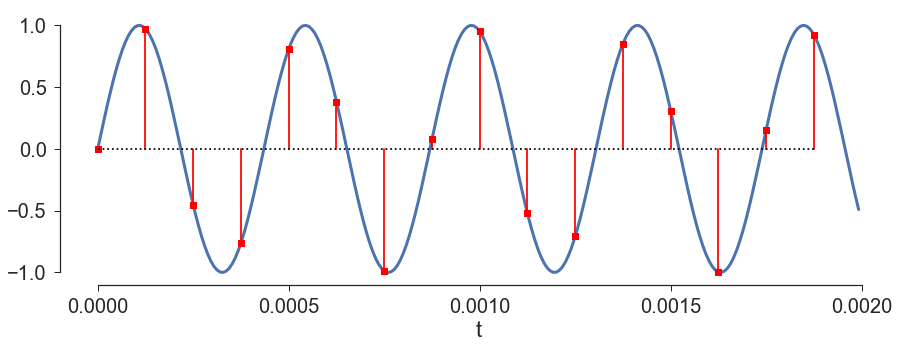

In [28]:
# our "leaky" signal from above
fig, ax = pl.subplots(1,1,figsize=(15,5))
nc = 250
tc = np.linspace(0,N/fs,nc,endpoint=False)
x2c = np.sin(2*np.pi*2300*tc)
ax.plot(tc,x2c,lw=3)
ax.stem(td,x2,linefmt='r-',markerfmt='rs',basefmt='k:')
ax.set(xticks=np.linspace(0,.002,5), xlabel='t'); sb.despine(ax=ax, trim=True)

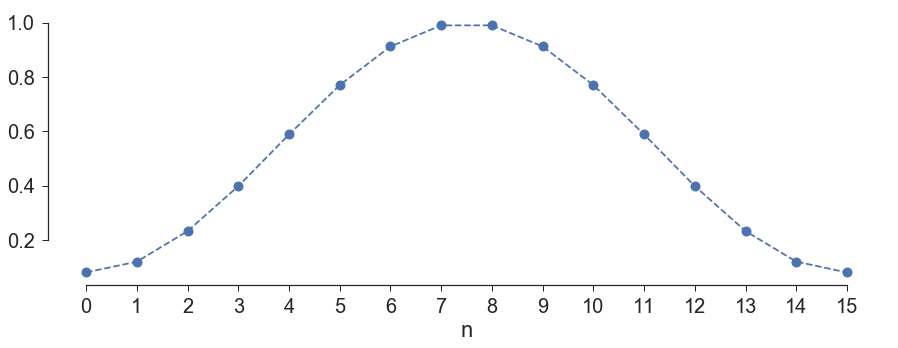

In [29]:
from scipy.signal import hamming # import window function hamming()
win = hamming(N) # create N point hamming window and then plot it...

fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(win,'o--',ms=10); ax.set(xticks=np.arange(16), xlabel='n'); sb.despine(ax=ax, trim=True)

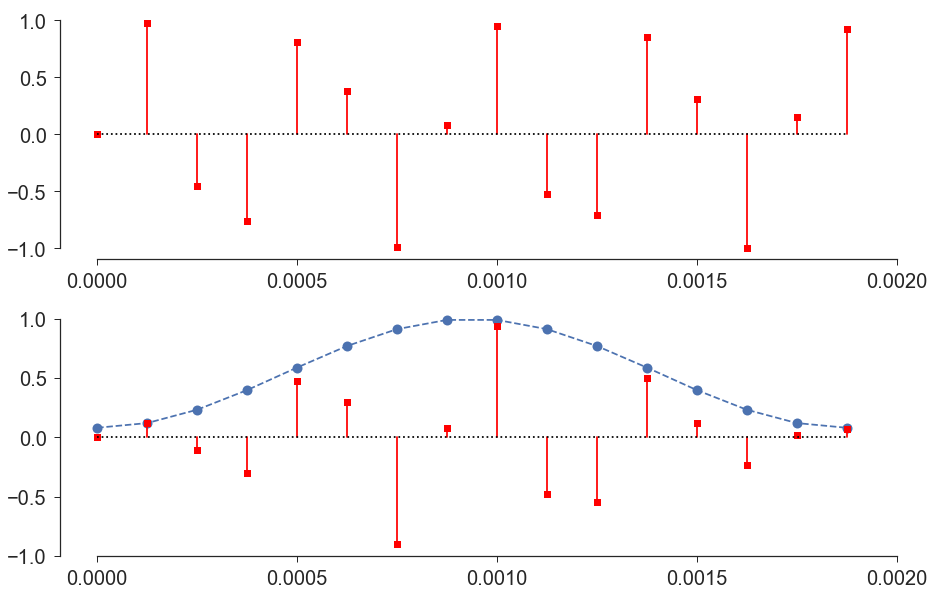

In [30]:
x2w = x2*win # multiply "leaky" signal and hamming window
# plot the original samples signal and the windowed signal
fig, axes = pl.subplots(2,1,figsize=(15,10)); ax1, ax2 = axes
ax1.stem(td,x2,linefmt='r-',markerfmt='rs',basefmt='k:') # original
ax1.set(xticks=np.linspace(0,.002,5), yticks=np.linspace(-1,1,5))
ax2.plot(td,win,'o--',ms=10) # window function
ax2.stem(td,x2w,linefmt='r-',markerfmt='rs',basefmt='k:') # windowed signal
ax2.set(xticks=np.linspace(0,.002,5), yticks=np.linspace(-1,1,5))
[sb.despine(ax=axi, trim=True) for axi in axes];

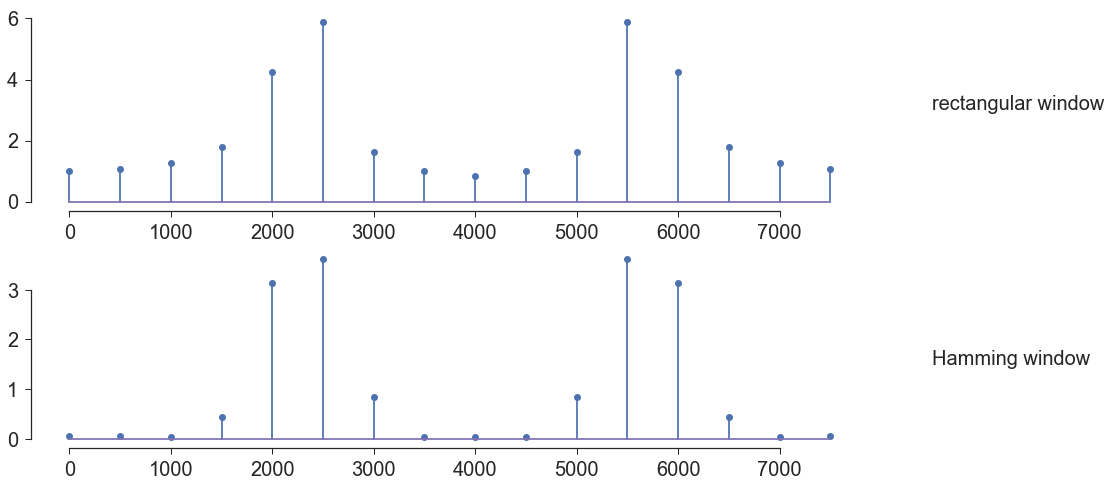

In [31]:
Xw = fft(x2w) # take FFT of the hamming-windowed signal
# plot the FFT spectra for the non-windowed and windowed signals to illustrate reduction in leakage
fig, axes = pl.subplots(2,1,figsize=(15,8)); ax1, ax2 = axes
ax1.stem(np.arange(0,fs,fs/N),np.absolute(X2)); ax1.text(8500, 3, 'rectangular window', fontsize=20)
ax2.stem(np.arange(0,fs,fs/N),np.absolute(Xw)); ax2.text(8500, 1.5, 'Hamming window', fontsize=20)
sb.despine(ax=ax1,trim=True); sb.despine(ax=ax2,trim=True)

Note that the spectral magnitudes in the two plots above are different, due to the application of the Hamming window. The estimated magnitudes depend on both the amplitude of the time-domain signal and on how many samples you are analyzing:

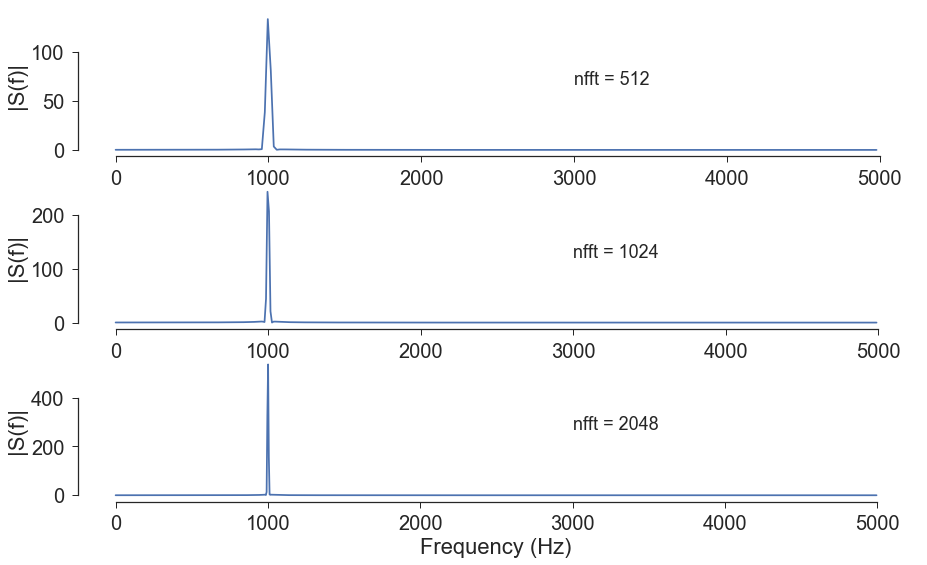

In [32]:
fs = 10000
t = np.linspace(0, 1, fs, endpoint=False)
s = np.cos(2*np.pi*1000*t)
nfft = [512, 1024, 2048]
fig, axes = pl.subplots(3, 1, figsize=(15,9))
for i, n in enumerate(nfft):
    start = np.int(5000-n/2) # midpoint minus half of fft length
    stop = start + n
    ws = hamming(n)*s[start:stop]
    Sp = np.abs(fft(ws))[:np.int(n/2)]
    freq = np.linspace(0, np.int(fs/2), np.int(n/2), endpoint=False)
    axes[i].plot(freq,Sp)
    sb.despine(ax=axes[i], trim=True)
    axes[i].set(ylabel='|S(f)|')
    axes[i].text(3000, .5*np.max(Sp), 'nfft = ' + str(n), fontsize=18)
axes[2].set(xlabel='Frequency (Hz)');

We can normalize our spectral slices by dividing by the number of samples to avoid this problem:

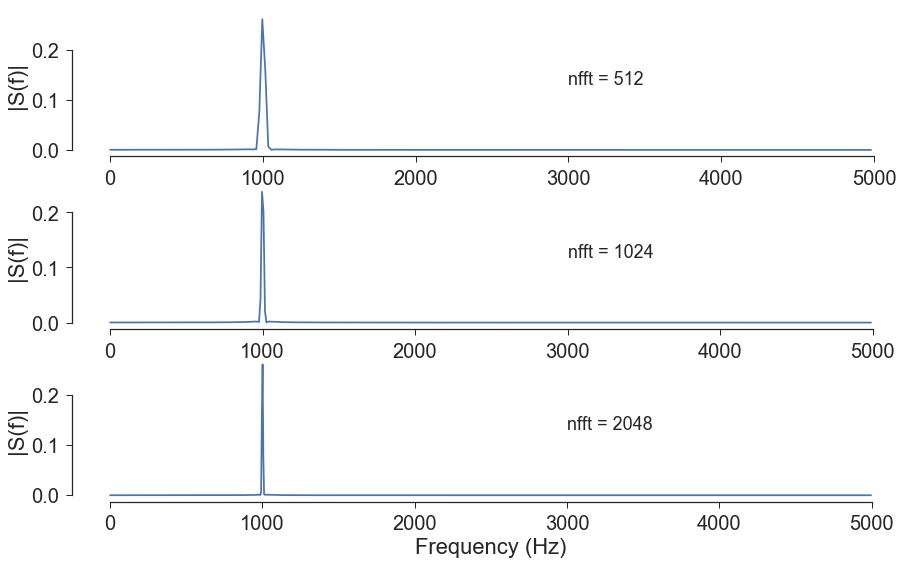

In [33]:
fig, axes = pl.subplots(3, 1, figsize=(15,9))
for i, n in enumerate(nfft):
    start = np.int(5000-n/2) # midpoint minus half of fft length
    stop = start + n
    ws = hamming(n)*s[start:stop]
    Sp = np.abs(fft(ws))[:np.int(n/2)]/n # dividing by n
    freq = np.linspace(0, np.int(fs/2), np.int(n/2), endpoint=False)
    axes[i].plot(freq,Sp)
    sb.despine(ax=axes[i], trim=True)
    axes[i].set(ylabel='|S(f)|')
    axes[i].text(3000, .5*np.max(Sp), 'nfft = ' + str(n), fontsize=18)
axes[2].set(xlabel='Frequency (Hz)');

### A semi-realistic use case

In order to make it more clear how all of this can be used in a real research setting, we'll use DFTs to construct a spectrogram of complex signal.

First, we'll use the `scipy.signal` function `chirp()` to make a tone with time-varying frequency:

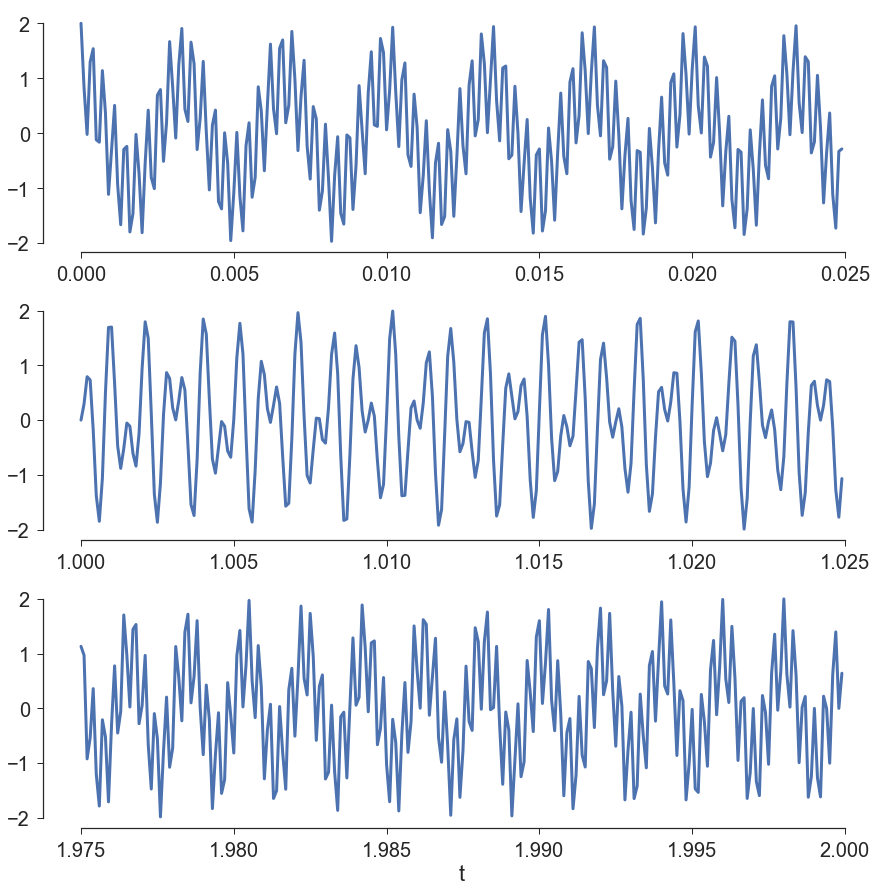

In [34]:
fs = 10000 # sampling frequency
t = np.linspace(0, 2, 2*fs, endpoint=False) # time vector
f0a = 300 # initial frequency
t1 = 2 # time t1
f1a = 3000 # frequency at time t1
metha = 'quadratic' # function describing frequency change
s_a = chirp(t=t, f0=f0a, t1=t1, f1=f1a, method=metha)
f0b = 2750
f1b = 500
methb = 'linear'
s_b = chirp(t=t, f0=f0b, t1=t1, f1=f1b, method=methb)

s = s_a + s_b

wv.write('chirp.wav', fs, s)

fig, axes = pl.subplots(3, 1, figsize=(15,15))
nv = 250 # number of samples to visualize
starts = [0, fs, 2*fs-nv] # starting points for visualization of segments of s
[axes[i].plot(t[st:st+nv],s[st:st+nv], lw=3) for i, st in enumerate(starts)]
[sb.despine(ax=axes[i], trim=True) for i in range(3)]
axes[2].set(xlabel='t');

Next, we'll create some variables that we'll use to take DFTs of segments of this signal, concatenating the magnitude spectra as we go. These variables will specify the number of samples of each segment of the signal, how much overlap neighboring segments have, and how many total segments we will extract and analyze. We will then create a container for the spectra we'll be calculating.

We'll be using the function `fft()` to do this. It's worth noting that the FFT is best used with segments that have lengths that are powers of two (and it can be remarkably slow with signals with durations that don't match up well with the underlying algorithm). So, we need to choose segments lengths that are powers of two: 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, etc...

Once we have our initial variables, we'll use a loop to figure out starting and stopping points for each segment, extract the segments, apply a window, take the FFT, get the magnitude spectra and store them, and then plot our spectrogram.

We can play around with the variables to see how our choices affect the way the spectrogram looks, too.

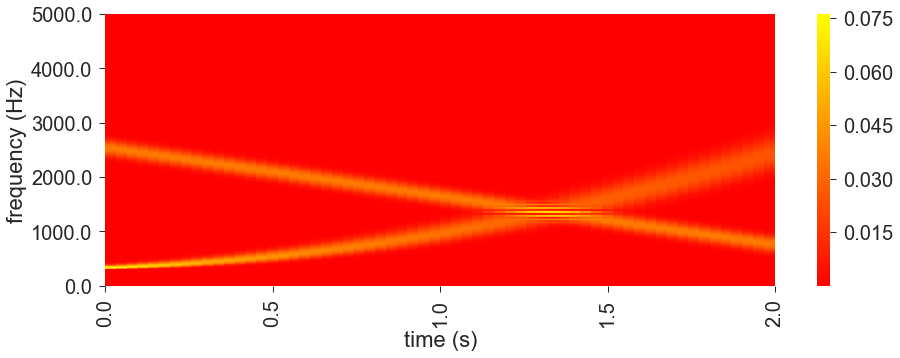

In [35]:
nfft = 2**12 # number of samples in each fft
ham = hamming(nfft)
nolp = nfft-2**8 # number of overlapping samples from one window to the next
nspec = np.int((len(s)-nfft)/(nfft-nolp)) # number of spectral slices we will calculate
spectra = np.zeros((np.int(nfft/2), nspec)) # container for spectral slices

for i in range(nspec):
    start = i*(nfft-nolp)
    stop = start + nfft
    ws = ham*s[start:stop]
    S = fft(ws)
    spectra[:,i] = np.abs(S)[:np.int(nfft/2)]/nfft

freq = np.linspace(0, fs/2, 6)[::-1]
time = np.linspace(0, 2, 5)

fig, ax = pl.subplots(1, 1, figsize=(15,5))
sb.heatmap(spectra[::-1,:], ax=ax, cmap=cm.autumn)
ax.set(yticks=np.linspace(0,nfft/2,6), yticklabels=freq, ylabel='frequency (Hz)',
       xticks=np.linspace(0,nspec,5), xticklabels=time, xlabel='time (s)');

### Summary

Digital signal processing involves the analysis (and synthesis) of discrete-time signals. We discussed how the sampling frequency affects the frequencies that can be accurately represented in digital signals. Then, using complex numbers and some basic relationships between trigonometric functions and the exponential function, we showed how the DFT gives us correlations between a time domain signal and sinusoids (i.e., parts of complex exponentials) at certain analysis frequencies. The magnitude and phase angle of the elements of the DFT then tell us the (relative) amplitude and phase shifts of the components of our signal. We briefly discussed how using a window function in the time domain can reduce leakage and give us a cleaner estimate of the magnitude spectrum of our signal, and then we briefly discussed how the magnitude of the spectral slices are related to the number of samples we use in our DFTs. Finally, we generated a chirp and made a spectrogram to visualize its frequency structure.